In [1]:
import numpy as np
import pandas as pd

In [2]:
delivery = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [3]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
total_runs_df = (delivery.groupby(['match_id','inning']).sum()['total_runs']+1).reset_index()
total_runs_df = total_runs_df[total_runs_df['inning'] == 1]

In [5]:
matches_df = matches.merge(total_runs_df,left_on='id',right_on='match_id')

In [6]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [8]:
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [9]:
matches_df = matches_df[matches_df['team1'].isin(teams)]
matches_df = matches_df[matches_df['team2'].isin(teams)]

In [10]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,1,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,1,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,...,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,1,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,1,159


In [11]:
matches_df = matches_df[matches_df['dl_applied'] == 0]

In [12]:
matches_df.shape

(626, 21)

In [13]:
matches_df = matches_df[['match_id','city','winner','total_runs']]

In [14]:
delivery_df = matches_df.merge(delivery,on='match_id')

In [15]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [16]:
delivery_df['current_score'] = delivery_df.groupby(['match_id']).cumsum()['total_runs_y']

In [17]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [18]:
delivery_df['balls_left'] = (126 - (delivery_df['over']*6 + delivery_df['ball']))

In [19]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118


In [20]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wicket = delivery_df.groupby(['match_id']).cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wicket
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [21]:
delivery_df.shape

(72413, 28)

In [22]:
def winner(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [23]:
delivery_df['result'] = delivery_df.apply(winner,axis=1)

In [24]:
delivery_df['crr'] = delivery_df['current_score']*6/(120 - delivery_df['balls_left'])

In [25]:
delivery_df['rrr'] = delivery_df['runs_left']*6/delivery_df['balls_left']

In [26]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,result,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,0,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,0,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,0,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,0,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,0,8.4,10.486957


In [27]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [28]:
final_df = final_df.sample(final_df.shape[0])

In [29]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
117344,Kolkata Knight Riders,Delhi Daredevils,Delhi,78,37,5,187,7.879518,12.648649,0


In [30]:
final_df.dropna(inplace=True)

In [31]:
final_df.drop_duplicates(inplace=True)

In [32]:
final_df.shape

(71004, 10)

In [33]:
final_df = final_df[final_df['balls_left'] != 0]

In [34]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,70770.000000,70770.000000,70770.000000,70770.000000,70770.000000,70770.000000,70770.000000
mean,93.505228,62.774495,7.549569,166.758542,7.450179,10.575342,0.526706
std,49.963581,33.249897,2.124383,29.286411,2.279234,14.083437,0.499290
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.272727,7.269231,0.000000
50%,93.000000,63.000000,8.000000,166.000000,7.500000,9.000000,1.000000
75%,131.000000,91.000000,9.000000,186.000000,8.700000,11.040000,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000,1.000000


In [35]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1:]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
111793,Delhi Daredevils,Chennai Super Kings,Raipur,115,114,10,120,5.000000,6.052632
102609,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,124,98,10,167,11.727273,7.591837
69347,Chennai Super Kings,Kolkata Knight Riders,Kolkata,37,26,7,159,7.787234,8.538462
89815,Rajasthan Royals,Royal Challengers Bangalore,Abu Dhabi,50,104,10,71,7.875000,2.884615
100465,Chennai Super Kings,Kings XI Punjab,Mumbai,60,19,3,227,9.920792,18.947368
...,...,...,...,...,...,...,...,...,...
44255,Rajasthan Royals,Mumbai Indians,Jaipur,58,12,3,175,6.500000,29.000000
148779,Mumbai Indians,Chennai Super Kings,Chennai,76,67,8,137,6.905660,6.805970
23752,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,87,72,10,140,6.625000,7.250000
34241,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,70,78,10,136,9.428571,5.384615


In [38]:
trf  = ColumnTransformer(transformers=[
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [39]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)
x_train_trf

array([[  0.        ,   0.        ,   1.        , ..., 120.        ,
          5.        ,   6.05263158],
       [  0.        ,   0.        ,   0.        , ..., 167.        ,
         11.72727273,   7.59183673],
       [  0.        ,   0.        ,   0.        , ..., 159.        ,
          7.78723404,   8.53846154],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 140.        ,
          6.625     ,   7.25      ],
       [  0.        ,   0.        ,   0.        , ..., 136.        ,
          9.42857143,   5.38461538],
       [  0.        ,   0.        ,   0.        , ..., 149.        ,
          5.63478261,  49.2       ]])

In [40]:
pipe = make_pipeline(trf,LogisticRegression(solver='liblinear'))

In [41]:
pipe.fit(x_train,y_train)

F:\Users\MUHAMMAD AWAIS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [42]:
y_pred = pipe.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred)

0.8050727709481419

In [44]:
pipe1 = make_pipeline(trf,RandomForestClassifier())

In [45]:
pipe1.fit(x_train,y_train)

F:\Users\MUHAMMAD AWAIS\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [46]:
y_pred1 = pipe1.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9987282746926663

<AxesSubplot:>

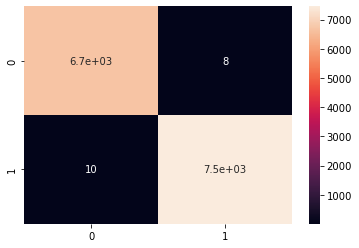

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

<AxesSubplot:>

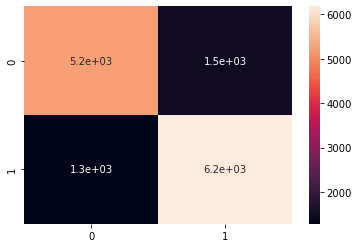

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

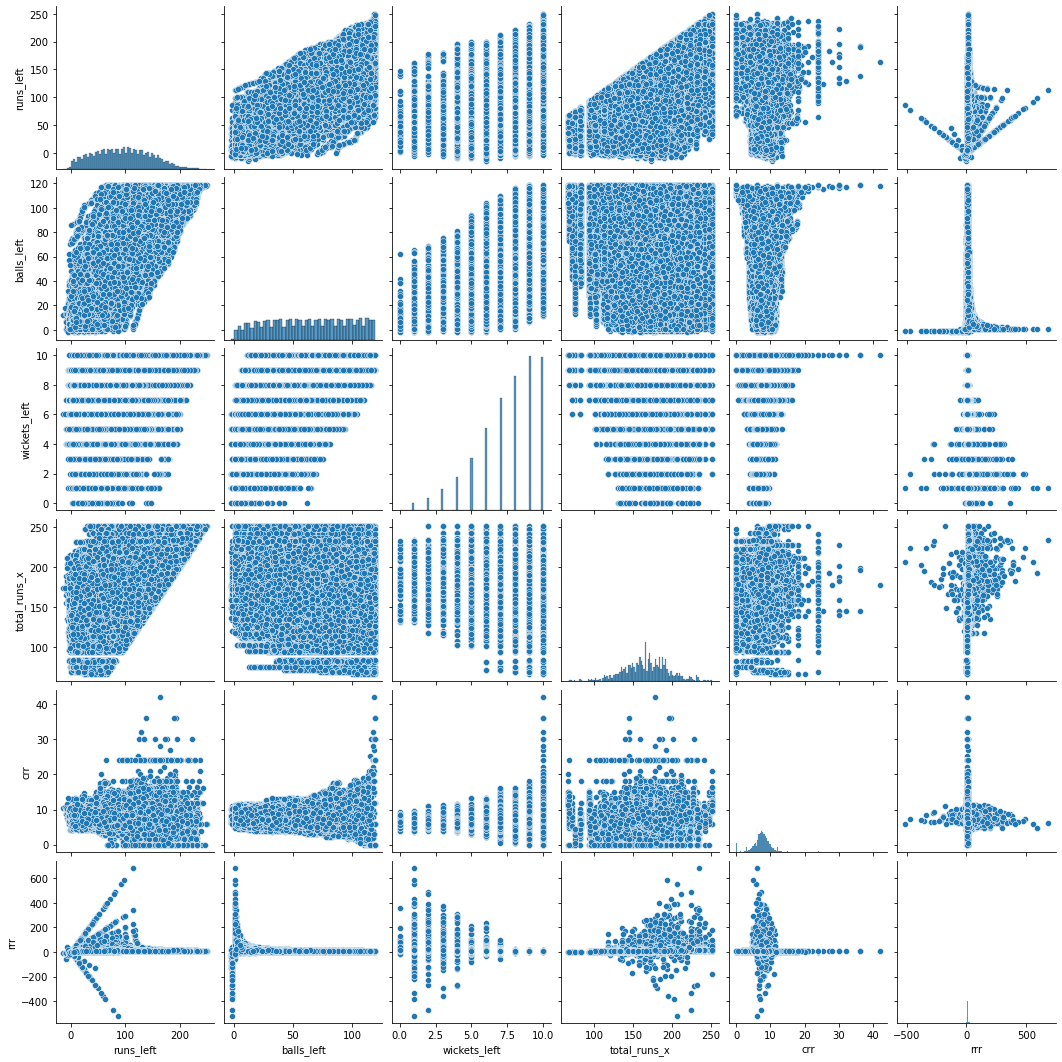

In [49]:
sns.pairplot(data=x)

<AxesSubplot:>

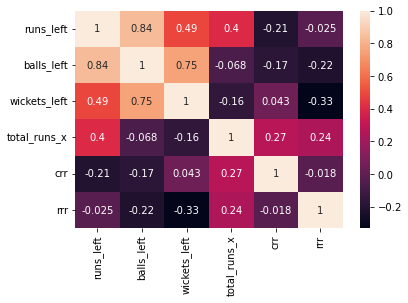

In [50]:
sns.heatmap(x.corr(),annot=True)

In [51]:
x['city'].unique()

array(['Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Dharamsala', 'Mumbai',
       'Chandigarh', 'Abu Dhabi', 'Jaipur', 'Durban', 'Hyderabad',
       'Mohali', 'Cuttack', 'Cape Town', 'Centurion', 'Port Elizabeth',
       'Ahmedabad', 'Visakhapatnam', 'Bloemfontein', 'Bengaluru', 'Pune',
       'Ranchi', 'East London', 'Indore', 'Raipur', 'Johannesburg',
       'Kimberley', 'Sharjah', 'Nagpur'], dtype=object)

In [52]:
city = ['Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Dharamsala', 'Mumbai',
       'Chandigarh', 'Abu Dhabi', 'Jaipur', 'Durban', 'Hyderabad',
       'Mohali', 'Cuttack', 'Cape Town', 'Centurion', 'Port Elizabeth',
       'Ahmedabad', 'Visakhapatnam', 'Bloemfontein', 'Bengaluru', 'Pune',
       'Ranchi', 'East London', 'Indore', 'Raipur', 'Johannesburg',
       'Kimberley', 'Sharjah', 'Nagpur']

In [53]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [56]:
 pickle.load(pipe,open('pipe.pkl','rb'))

TypeError: load() takes exactly 1 positional argument (2 given)